In [1]:
import pandas as pd
fp = "C:\\Users\\Alexandria\\AppData\\Roaming\\Python\\Python311\\Scripts\\Capstone\\Table.csv" #file path
with open(fp) as x:
    ncols = len(x.readline().split(','))
column_names = ["GeoFips","GeoName","LineCode",
"1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df = pd.read_csv(fp, skiprows=3, nrows=153, usecols=column_names, sep=',') #read csv file
df = df.dropna() 

#Picking the variables 
x = df.drop(columns=['GeoName','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']) #indpendent variables
y = df[['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].copy() #dependent variables

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

#split the variable sets into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[df.columns[3:-1]].values  # Year columns '1997' to '2021'
y = df['2021'].values  # Use the '2021' column as the target for predicting 2022 values

# Make sure the dimensions of X and y match
if X.shape[0] != y.shape[0]:
    raise ValueError("Number of samples in X and y do not match!")

machineLearningModel = LinearRegression()
machineLearningModel.fit(X, y)

# To predict values for 2022/2023 replace the values in the below array with some data for the year 2022/2023
X_predict = np.array([[48276,51139,55495,59925,63025,66217,70439,76919,83608,89238,94007,95423,91388,93083,96161,98619,101367,105625,109634,113497,119650,126412,132074,129832]])

y_predict = machineLearningModel.predict(X_predict)

print("$",*y_predict)

$ 152242.97556661634


In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y, machineLearningModel.predict(X)))
print("Coefficients: \n", machineLearningModel.coef_)
print("R-squared:", r2_score(y, machineLearningModel.predict(X)))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y, machineLearningModel.predict(X))))

Mean Squared Error: 9.716614928789566e-22
Coefficients: 
 [0.02371058 0.02390856 0.02806703 0.03000615 0.03196315 0.03514054
 0.03678337 0.03917971 0.0431255  0.05458507 0.06042949 0.06477758
 0.062557   0.06558206 0.06957087 0.07519048 0.07885091 0.08192719
 0.08671205 0.09389513 0.09724001 0.10390133 0.10544624 0.11299931]
R-squared: 1.0
Root Mean Squared Error: 3.11714852530154e-11


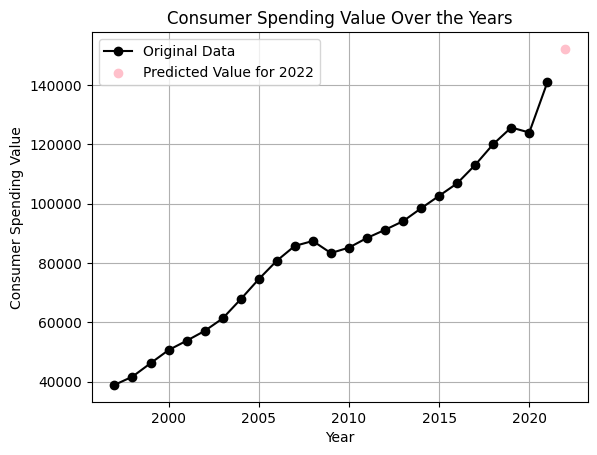

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the data in the format: years_original, values_original
years_original = df.columns[3:].astype(int)  # Assuming years start from the 4th column onwards
values_original = df.iloc[:, 3:].values  # Extract all rows for columns starting from the 4th column

# Predict the average consumer spending value for 2022 based on the inputted values
predicted_value_2022 = machineLearningModel.predict(X_predict)[0]

# Plotting the data
plt.plot(years_original, values_original[0], marker='o', color="black", label='Original Data')  # Using the first row for plotting
plt.scatter(2022, predicted_value_2022, marker='o', color="pink", label='Predicted Value for 2022') #can change 2022 to 2023 if visualizing data for 2023
plt.xlabel('Year')
plt.ylabel('Consumer Spending Value')
plt.title('Consumer Spending Value Over the Years')
plt.legend()
plt.grid(True)
plt.show()

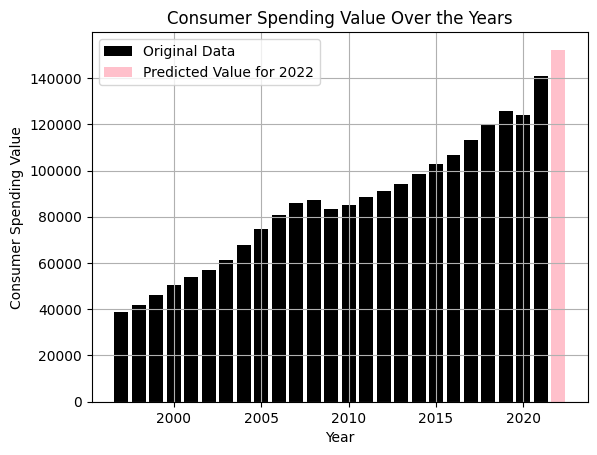

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the data in the format: years_original, values_original
years_original = df.columns[3:].astype(int)  # Assuming years start from the 4th column onwards
values_original = df.iloc[:, 3:].values  # Extract all rows for columns starting from the 4th column

# Predict the average consumer spending value for 2022/2023 based on the inputted values
predicted_value_2022 = machineLearningModel.predict(X_predict)[0] #can change 2022 to 2023 if visualizing data for 2023

# Plotting the data as a bar graph
plt.bar(years_original, values_original[0], color="black", label='Original Data')  # Using the first row for plotting
plt.bar(2022, predicted_value_2022, color="pink", label='Predicted Value for 2022') #can change 2022 to 2023 if visualizing data for 2023
plt.xlabel('Year')
plt.ylabel('Consumer Spending Value')
plt.title('Consumer Spending Value Over the Years')
plt.legend()
plt.grid(True)
plt.show()

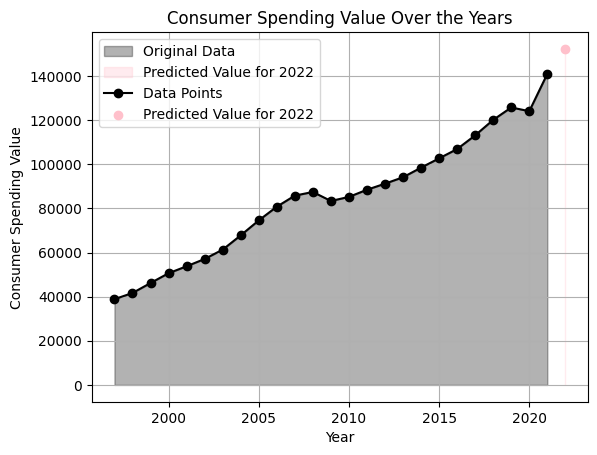

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the data in the format: years_original, values_original
years_original = df.columns[3:].astype(int)  # Assuming years start from the 4th column onwards
values_original = df.iloc[:, 3:].values  # Extract all rows for columns starting from the 4th column

# Predict the average consumer spending value for 2022/2023 based on the inputted values
predicted_value_2022 = machineLearningModel.predict(X_predict)[0] #can change 2022 to 2023 if visualizing data for 2023

# Plotting the data as an area graph
plt.fill_between(years_original, values_original[0], color="black", alpha=0.3, label='Original Data')
plt.fill_between([2022], [predicted_value_2022], color="pink", alpha=0.3, label='Predicted Value for 2022') #can change 2022 to 2023 if visualizing data for 2023
plt.plot(years_original, values_original[0], marker='o', color="black", label='Data Points')
plt.scatter(2022, predicted_value_2022, marker='o', color="pink", label='Predicted Value for 2022') #can change 2022 to 2023 if visualizing data for 2023
plt.xlabel('Year')
plt.ylabel('Consumer Spending Value')
plt.title('Consumer Spending Value Over the Years')
plt.legend()
plt.grid(True)
plt.show()

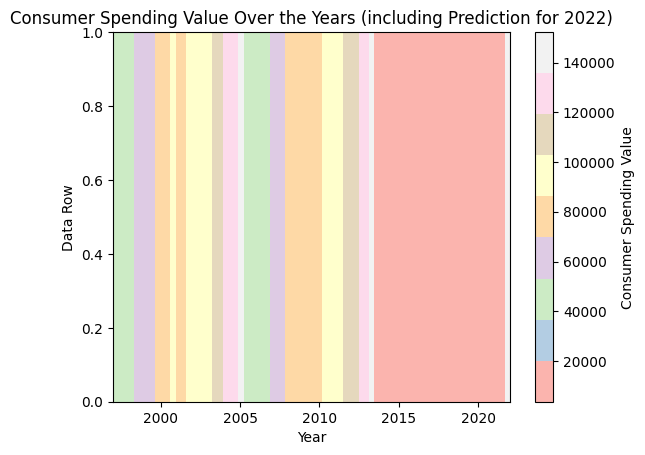

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the data in the format: years_original, values_original
years_original = df.columns[3:].astype(int)  # Assuming years start from the 4th column onwards
values_original = df.iloc[:, 3:].values  # Extract all rows for columns starting from the 4th column

# Predict the average consumer spending value for 2022 based on the inputted values
predicted_value_2022 = machineLearningModel.predict(X_predict)[0] #can change 2022 to 2023 if visualizing data for 2023

# Reshape values_original to (1, 25)
values_original = values_original.reshape(1, -1)

# Reshape predicted_value_2022 to (1, 25)
predicted_value_2022 = np.reshape(predicted_value_2022, (1, -1)) #rename to predicted_value_2023 if looking at 2023

# Combine original data and predicted value for 2022/2023 horizontally
data_matrix = np.hstack([values_original, predicted_value_2022]) #rename to predicted_value_2023 if looking at 2023

# Plotting the data as a heatmap
plt.imshow(data_matrix, cmap='Pastel1', aspect='auto', origin='lower',
           extent=[years_original[0], 2022, 0, 1]) #can change 2022 to 2023 if visualizing data for 2023
plt.colorbar(label='Consumer Spending Value')
plt.xlabel('Year')
plt.ylabel('Data Row')
plt.title('Consumer Spending Value Over the Years (including Prediction for 2022)') #can change 2022 to 2023 if visualizing data for 2023
plt.show()